This Notebook has been created by using PYTHON MACHINE LEARNING COOK BOOK by Prateek Joshi
# Linear Regression

# import necessary packages

In [1]:
import sys
import numpy as np
from sklearn import preprocessing
import matplotlib
import sklearn

# Create Data

In [ ]:
data=np.array([[3, -1.5, 2, -5.4], [0, 4, -0.3, 2.1], [1, 3.3, -1.9, -4.3]])

In [ ]:
a=data.reshape(12,1)
a

# Mean Normalization
# Subtract mean from each single variable to make mean 0. Helps to remove bias from features
# Manually x'= ((x-mean(x)) / (max(x) - min(x)))

In [ ]:
data_standardized=preprocessing.scale(data)
print ("\nMean =", data_standardized.mean(axis=0))
print ("Std deviation =", data_standardized.std(axis=0))

# Feature Scaling. The values of each feature in a datapoint can vary. Ex. Number of bedroom 1-5, Size of house 200-5000sqft.
# So it is important to scale them so that this becomes a level playing field
# Manually x'=((x-min(x))/(max(x)-min(x)))

In [ ]:
data_scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled=data_scaler.fit_transform(data)
print ("\nMin Max scaled data =", data_scaled)

# Linear Regression

In [ ]:
data_singlevar=sys.argv[1]
X=[]
y=[]
with open ('data_singlevar.txt', 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

# Split Data into Training and Test Sets. %80 Trainning, %20 Test

In [ ]:
num_training = int(0.8 * len(X))
num_test= len(X) - num_training

Training Data

In [ ]:
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

Test Data

In [ ]:
X_test = np.array(X[num_training:]).reshape(num_test,1)
y_test = np.array(y[num_training:])

In [11]:
from sklearn import linear_model

In [ ]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_train_pred=linear_regressor.predict(X_train)

In [ ]:
plt.figure()

In [ ]:
plt.scatter(X_train, y_train, color='green')

In [ ]:
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training Data')
plt.show()

In [ ]:
y_test_pred = linear_regressor.predict(X_test)

In [ ]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test Data')
plt.show()

In [ ]:
import sklearn.metrics as sm

In [ ]:
print ('Mean absolute error =', round(sm.mean_absolute_error(y_test,y_test_pred),2))

In [ ]:
print ('Mean squared error =', round(sm.mean_squared_error(y_test,y_test_pred),2))

In [ ]:
print ('Median absolute error =', round(sm.median_absolute_error(y_test,y_test_pred),2))

In [ ]:
print ('Explained variance score =', round(sm.explained_variance_score(y_test,y_test_pred),2))

In [ ]:
print ('R2 score =', round(sm.r2_score(y_test,y_test_pred),2))

# To save trained model

In [ ]:
import _pickle as pickle

In [ ]:
output_model_file = 'saved_model.pkl'
with open (output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)


In [ ]:
with open (output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)
    

In [ ]:
y_test_pred_new = model_linregr.predict(X_test)
print ('\nNew mean absolute error =', round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

# Ridge Regression (Regularization)

In [ ]:
from sklearn import linear_model
ridge_regressor = linear_model.Ridge(alpha = 0.01, fit_intercept = True, max_iter = 10000)

# Load Data

In [120]:
input_file = 'data_multivar.txt'

X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1]) 

X = np.array(X)
y = np.array(y)

If you want your regression robust against outliers, you need to assign a higher value to alpha.

In [121]:
num_training = int(0.8 * 500)
num_test= 500 - num_training

# Training Data

In [123]:
X_train = np.array(X[:num_training]).reshape((num_training,3))
y_train = np.array(y[:num_training])

# Test Data

In [124]:
X_test = np.array(X[num_training:]).reshape(num_test,3)
y_test = np.array(y[num_training:])

In [125]:
ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

In [126]:
import sklearn.metrics as sm

In [127]:
print('Mean Absolute Error =', round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print('Mean squared Error =', round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print('Median Absolute Error =', round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print('Explain variance score =', round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print('R2 Score =', round(sm.r2_score(y_test, y_test_pred_ridge),2))

Mean Absolute Error = 3.95
Mean squared Error = 23.15
Median Absolute Error = 3.69
Explain variance score = 0.84
R2 Score = 0.83


# Building a Polynomial Regressor

In [ ]:
plt.scatter(X,y, color='green')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial= PolynomialFeatures(degree=3)

In [ ]:
num_training = int(0.8 * len(X))
num_test= len(X) - num_training

X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

X_test = np.array(X[num_training:]).reshape(num_test,1)
y_test = np.array(y[num_training:])

In [ ]:
X_poly= polynomial.fit(X_train)

In [ ]:
lm=linear_model.LinearRegression()

In [ ]:
lm.fit(X_poly,y_train)

In [ ]:
linear_regressor.predict(X_train)

# Decision Tree Regressor

In [12]:
import csv
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
housing_data=datasets.load_boston()

# Shuffle the data

In [22]:
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

In [23]:
num_training = int (0.8*len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Decision Tree Fit

In [24]:
dt_regressor = DecisionTreeRegressor(max_depth=4)

In [25]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# AdaBooster Fit

In [26]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

# Evaluate performance of Decision Tree regressor

In [27]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print ("Mean Squared Error =", round(mse,2))
print ("Explained Variance Score =", round(evs,2))

Mean Squared Error = 14.79
Explained Variance Score = 0.82


# Evaluate performance of AdaBoost

In [28]:
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test,y_pred_ab)
print ("Mean Squared Error =", round(mse,2))
print ("Explained Variance Score =", round(evs,2))

Mean Squared Error = 7.64
Explained Variance Score = 0.91


# Remember We look for Low MSE and High EVS

# Let's Plot the  importance of features

In [46]:
def plot_feature_importances(feature_importances, title, feature_names):
    #Normalize the importance values
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(feature_importances))
    #Center the location of the labels on the X-axis
    pos= np.arange(index_sorted.shape[0]) + 0.5
    
    # Plot the bar graph
    plt.figure()
    plt.bar(pos,feature_importances[index_sorted], align = 'center')
    plt.xticks( pos, feature_names[index_sorted])
    plt.ylabel ('Relative Importance')
    plt.title(title)
    plt.show()

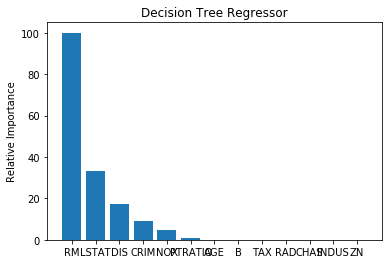

In [48]:
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree Regressor', housing_data.feature_names)

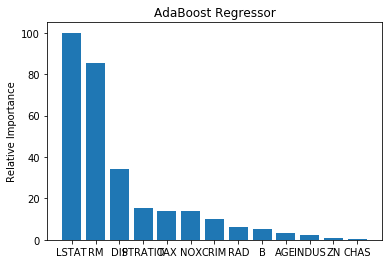

In [49]:
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost Regressor', housing_data.feature_names)

# Random Forest Regressor

In [89]:
import csv
from sklearn.ensemble import RandomForestRegressor
#from housing import plot_feature_importances

In [90]:
def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'r'), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[2:13])
        y.append(row[-1])

    # Extract feature names
    feature_names = np.array(X[0])

    # Remove the first row because they are feature names
    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

In [91]:
bike_day=load_dataset('bike_day.csv')

In [92]:
#X,y,feature_names = load_dataset(sys.argv[1])
#X,y= shuffle(X,y,random_state=7)

In [93]:
num_training = int(0.9*len(X))
X_train, y_train = X[:num_training],y[:num_training]
X_test, y_test = X[num_training:],y[num_training:]

In [94]:
rf_regressor = RandomForestRegressor(n_estimators = 1000,
                         max_depth=10,min_samples_split=1.0)

In [95]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=1.0,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
y_pred = rf_regressor.predict(X_test)

In [97]:
mse= mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print ('Mean Squared Error =', round(mse,2))
print ('Explained Variance Score =', round(evs,2))

Mean Squared Error = 60.79
Explained Variance Score = 0.0


In [ ]:
#plot_feature_importances(rf_regressor.feature_importances_,
 #           'Random Forest Regressor',bike_day.feature_names)

This Notebook has been created by using PYTHON MACHINE LEARNING COOK BOOK by Prateek Joshi